# Three variable Monte-Carlo real mass function integral

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
%load_ext autoreload
%autoreload 2

/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:20: RuntimeWarning: divide by zero encountered in log
  n = np.log(hist_data[0]) #numbers in each bin
/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:29: RuntimeWarning: invalid value encountered in double_scalars
  slope = (n[i+1] - n[i])/(bins[i+1] - bins[i])


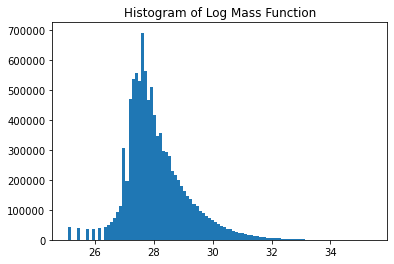

In [2]:
from mass_function import MassFunction
mf = MassFunction()

# Richness scaling relations

In [3]:
%run /global/project/projectdirs/des/zhou/spt_selection/header.py

In [4]:
import copy
lnM = np.log(mf.mass)
lnMwl_mean = copy.deepcopy(lnM)
nh = len(lnM)

In [5]:
lnlam_mean = alpha_lam*lnM + pi_lam
lnSZ_mean = alpha_SZ*lnM + pi_SZ

# MonteCarlo

First, Monte Carlo from the covariance matrix and the mean. How does this work? 

Second, define a narrow richness bin to mimic the distribution of halo mass given richness. The expectation value given no correlation should be 
$$\frac{\lambda-\pi_{\lambda}}{\alpha_{\lambda}}$$

But the downward correction is 
$$-(\frac{\sigma_\lambda}{\alpha})^2 \beta$$

Third, 

In [6]:
color_list = ['r','g','b','y','c','m','k','tab:cyan', "gold"]

In [23]:
from MCO import MonteCarloObservables 

mco = MonteCarloObservables(nh,0.5,np.log(mf.mass), lnlam_mean=lnlam_mean, lnSZ_mean=lnSZ_mean, lnMwl_mean=lnMwl_mean,
                            scatter_lam=scatter_lam, scatter_Mwl=scatter_Mwl, scatter_SZ=scatter_SZ,
                            mf_slope_interp=mf.beta)
NBINS = 2

lam_array, SZ_array, diff_array, count_array = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins = NBINS+1,correction=True)
# lam_array_nc, SZ_array_nc, diff_array_nc, count_array_nc = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins = NBINS+1,correction=False)

32.49759236562413


In [24]:
count_array

array([[10103.]])

In [27]:
np.exp(diff_array)

array([[0.86618332]])

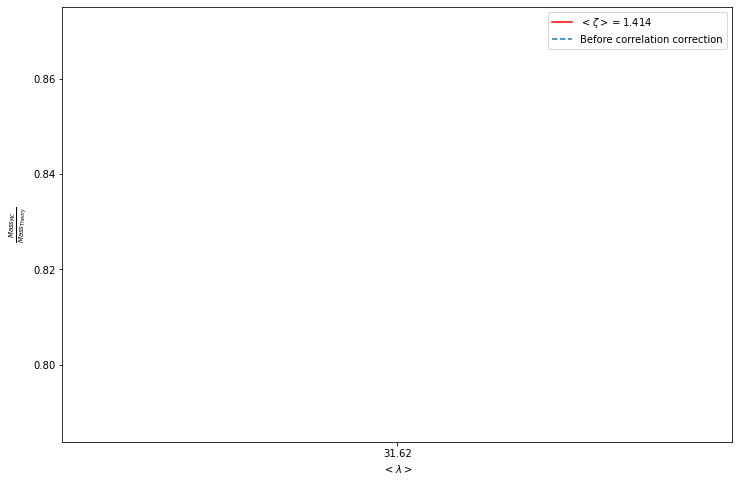

In [10]:
plt.figure(figsize=[12,8])
for i in range(NBINS):
    plt.plot(range(NBINS), np.exp(diff_array[i,:]), color=f'{color_list[i]}',label= f"$<\zeta> = {np.exp(SZ_array[i]):.3f}$")
    plt.plot(range(NBINS), np.exp(diff_array_nc[i,:]), "--", color=f'{color_list[i]}')
plt.plot([], [], '--', label="Before correlation correction")    
plt.legend()
# locs, labels = plt.xticks()
plt.xticks(np.arange(0, NBINS, step=1), [f"{np.exp(lam):.2f}" for lam in lam_array])
plt.xlabel("$<\lambda>$")
plt.ylabel(r"$\frac{Mass_{MC}}{Mass_{Theory}}$")
# plt.title("Comparision Before&After r Correction")
plt.show()

In [11]:
r_array = [0,0.25,0.5,0.75,0.99]

diff_list = [None] * len(r_array)
lam_list = [None] * len(r_array)
SZ_list = [None] * len(r_array)
count_list = [None] * len(r_array)

diff_list_nc = [None] * len(r_array)
lam_list_nc = [None] * len(r_array)
SZ_list_nc = [None] * len(r_array)
count_list_nc = [None] * len(r_array)

for i in range(len(r_array)):
    mco = MonteCarloObservables(nh,r_array[i],np.log(mf.mass), lnlam_mean=lnlam_mean, lnSZ_mean=lnSZ_mean, lnMwl_mean=lnMwl_mean,
                            scatter_lam=scatter_lam, scatter_Mwl=scatter_Mwl, scatter_SZ=scatter_SZ,
                            mf_slope_interp=mf.beta)
    lam_list[i], SZ_list[i], diff_list[i], count_list[i] = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins = NBINS+1,correction=True)
    lam_list_nc[i], SZ_list_nc[i], diff_list_nc[i], count_list_nc[i] = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins = NBINS+1,correction=False)

KeyboardInterrupt: 

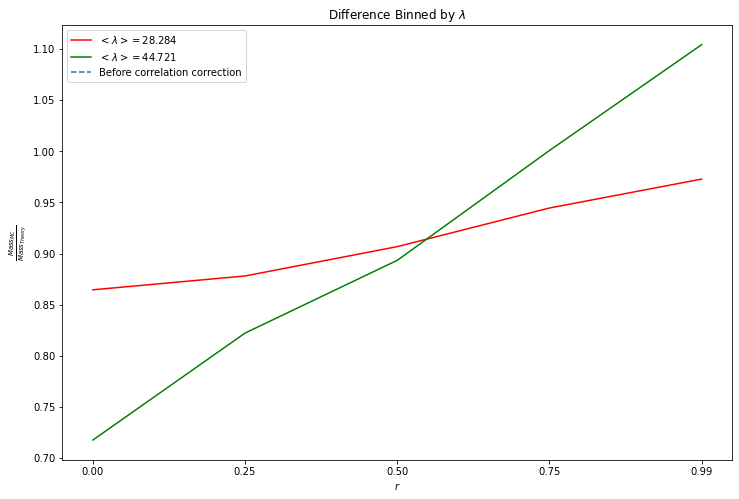

In [ ]:
#binned by lambda, marginalize SZ
diff_array_lambda = np.sum(np.array(diff_list), axis=1)/np.sum(np.invert(np.array(diff_list)==0),axis=1)
diff_array_lambda_nc = np.sum(np.array(diff_list_nc), axis=1)/np.sum(np.invert(np.array(diff_list_nc)==0),axis=1)

plt.figure(figsize=[12,8])
for i in range(len(lam_list[0])):
    plt.plot(range(len(r_array)), np.exp(diff_array_lambda[:,i]), color=f"{color_list[i]}", label= f"$<\lambda> = {np.exp(np.mean(np.array(lam_list)[:,i])):.3f}$")
    # plt.plot(range(len(r_array)), np.exp(diff_array_lambda_nc[:,i]), "--", color=f"{color_list[i]}")
plt.plot([], [], '--', label="Before correlation correction")    
plt.legend()
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 5, step=1), [f"{r:.2f}" for r in r_array])
plt.xlabel("$r$")
plt.ylabel(r"$\frac{Mass_{MC}}{Mass_{Theory}}$")
plt.title("Difference Binned by $\lambda$")
plt.show()

1.7550647

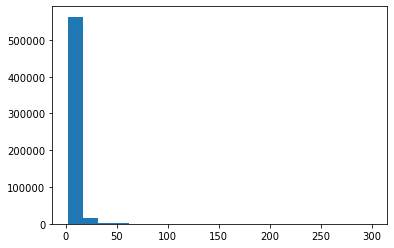

In [ ]:
plt.hist(np.exp(lnlam_mean),bins=20)
np.min(np.exp(lnlam_mean))

In [ ]:
np.exp(1.5)

4.4816890703380645

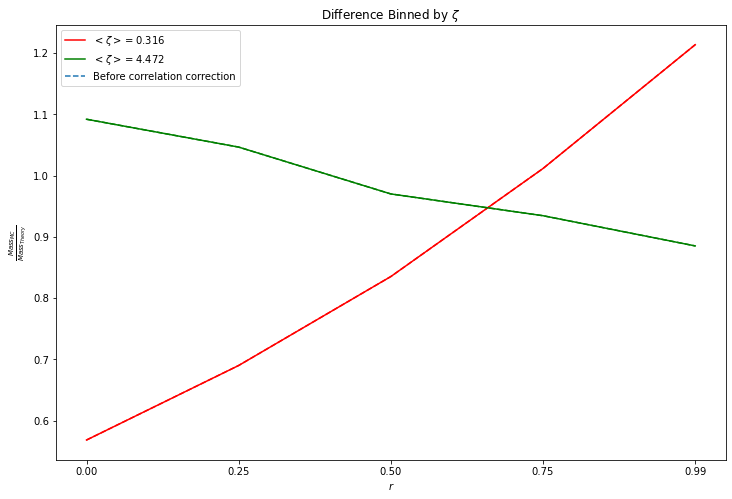

In [ ]:
#binned by SZ, marginalize lambda
diff_array_SZ = np.sum(np.array(diff_list), axis=2)/np.sum(np.invert(np.array(diff_list)==0),axis=2)
diff_array_SZ_nc = np.sum(np.array(diff_list_nc), axis=2)/np.sum(np.invert(np.array(diff_list_nc)==0),axis=2)

plt.figure(figsize=[12,8])
for i in range(len(SZ_list[0])):
    plt.plot(range(len(r_array)), np.exp(diff_array_SZ[:,i]),color=f"{color_list[i]}", label= f"$<\zeta> = {np.exp(np.mean(np.array(SZ_list)[:,i])):.3f}$")
    plt.plot(range(len(r_array)), np.exp(diff_array_SZ_nc[:,i]),"--",color=f"{color_list[i]}")
plt.plot([], [], '--', label="Before correlation correction")
plt.legend()
locs, labels = plt.xticks()
plt.xticks(np.arange(0, 5, step=1), [f"{r:.2f}" for r in r_array])
plt.xlabel("$r$")
plt.ylabel(r"$\frac{Mass_{MC}}{Mass_{Theory}}$")
plt.title("Difference Binned by $\zeta$")
plt.show()